
This project examines the fiscal management of local governments in the Dominican Republic, with the objective of unraveling expenditure patterns and obtaining financial insights. Through the use of analytical tools, such as correlation matrices, it seeks to reveal key relationships between different expenditure categories to support decision making and resource optimization. As a final resource, a map is developed in Folium that encompasses the results found for each municipality.

In [42]:
import pandas as pd

gastos_df = pd.read_excel("Gastos_DR_2022.xlsx", sheet_name="Gastos 2022")



1. Data Exploration and cleaning 

In [43]:
# Cheking data tipes 
gastos_df.dtypes

PERIODO                   int64
COD_MES                 float64
MES                      object
CÓD_REGIÓN_LEY_NUEVA      int64
REGIÓN_LEY_NUEVA         object
CÓD_REGIÓN_ANTERIOR       int64
REGIÓN_ANTERIOR          object
CÓD_REGIÓN                int64
REGIÓN                   object
CÓD_PROVINCIA             int64
PROVINCIA                object
CÓD_MUNICIPIO             int64
MUNICIPIO                object
CÓD_CAPÍTULO              int64
CAPÍTULO                 object
CÓD_ECO_TITULO           object
ECO_TITULO               object
CÓD_ECO_SUB_TITULO       object
ECO_SUB_TITULO           object
CÓD_CONCEPTO            float64
CONCEPTO                 object
CÓD_CUENTA               object
CUENTA                   object
MT_EG_VLR_DEVENGADO     float64
dtype: object

In [44]:
#Cheking Missing Values
missing_gastos = gastos_df.isnull().sum()
print("Missing values gastos:\n", missing_gastos)

Missing values gastos:
 PERIODO                     0
COD_MES                 54912
MES                     54912
CÓD_REGIÓN_LEY_NUEVA        0
REGIÓN_LEY_NUEVA            0
CÓD_REGIÓN_ANTERIOR         0
REGIÓN_ANTERIOR             0
CÓD_REGIÓN                  0
REGIÓN                      0
CÓD_PROVINCIA               0
PROVINCIA                   0
CÓD_MUNICIPIO               0
MUNICIPIO                   0
CÓD_CAPÍTULO                0
CAPÍTULO                    0
CÓD_ECO_TITULO              0
ECO_TITULO                  0
CÓD_ECO_SUB_TITULO          0
ECO_SUB_TITULO              0
CÓD_CONCEPTO                0
CONCEPTO                    0
CÓD_CUENTA                  0
CUENTA                      0
MT_EG_VLR_DEVENGADO         0
dtype: int64


In [45]:

# Filtering variables I need
columnas_gastos = ['MES', 'REGIÓN_LEY_NUEVA', 'PROVINCIA', 'MUNICIPIO', 'CAPÍTULO', 'CONCEPTO',   'MT_EG_VLR_DEVENGADO']
gastos_df = gastos_df[columnas_gastos]
gastos_df



,MES,REGIÓN_LEY_NUEVA,PROVINCIA,MUNICIPIO,CAPÍTULO,CONCEPTO,MT_EG_VLR_DEVENGADO
0,Enero,Región El Valle,Azua,Azua,Ayuntamiento Municipal de Azua de Compostela,Obras,20971739.06
1,Enero,Región El Valle,Azua,Azua,Junta de Distrito Municipal de Los Jovillos,Obras,1110798.18
2,Enero,Región El Valle,Azua,Las Charcas,Ayuntamiento Municipal de Las Charcas,Contratación de servicios,941202.00
3,Enero,Región El Valle,Azua,Azua,Junta de Distrito Municipal de Barreras,Obras,800000.00
4,Enero,Región El Valle,Azua,Tabara Arriba,Junta de Distrito Municipal de Los Toros,Obras,717273.00
...,...,...,...,...,...,...,...
352637,NaN,Región Cibao Noroeste,Valverde,Esperanza,Junta de Distrito Municipal de Paradero,Materiales y suministros,0.00
352638,NaN,Región Cibao Noroeste,Valverde,Esperanza,Junta de Distrito Municipal de Paradero,Remuneraciones y contribuciones,0.00
352639,NaN,Región Cibao Noroeste,Valverde,Esperanza,Junta de Distrito Municipal de Paradero,Transferencias Corrientes,0.00
352640,NaN,Región Cibao Noroeste,Valverde,Esperanza,Junta de Distrito Municipal de Paradero,Transferencias Corrientes,0.00


In [46]:
#Replace missing values in "No registrado"

gastos_df['MES'].fillna('Mes no registrado', inplace=True)

#Changing speelinf error (Octumbre -> Octubre)
gastos_df['MES'] = gastos_df['MES'].replace("Octumbre","Octubre")

C:\Users\franc\AppData\Local\Temp\ipykernel_9336\2844989254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gastos_df['MES'].fillna('Mes no registrado', inplace=True)


In [47]:
#Cheking unique values (We avoid the columns of expenses)


columns_of_interest_gastos = [col for col in gastos_df.columns if col not in ['MT_EG_VLR_DEVENGADO', 'MT_IG_VLR_PERCIBIDO']]

resumen_gastos = []


for column in columns_of_interest_gastos:
    cantidad_valores_unicos = gastos_df[column].nunique()
    resumen_gastos.append({'Columna': column, 'Cantidad de Valores Únicos': cantidad_valores_unicos})


print("\nResumen de Gastos:")
print(pd.DataFrame(resumen_gastos))




Resumen de Gastos:
            Columna  Cantidad de Valores Únicos
0               MES                          13
1  REGIÓN_LEY_NUEVA                          10
2         PROVINCIA                          32
3         MUNICIPIO                         157
4          CAPÍTULO                         393
5          CONCEPTO                          11


In [48]:

#Changing variables names

new_column_names = {
    'ECO_TITULO ': 'Economico_Titulo',  
    'ECO_SUB_TITULO ': 'Economico_Descriptivo',  
    'MT_EG_VLR_DEVENGADO': 'Gasto',
    'CAPÍTULO': 'Ayuntamiento' 
}

gastos_df.rename(columns=new_column_names, inplace=True)

print(gastos_df.columns)



Index(['MES', 'REGIÓN_LEY_NUEVA', 'PROVINCIA', 'MUNICIPIO', 'Ayuntamiento',
       'CONCEPTO', 'Gasto'],
      dtype='object')


In [49]:
#Unique values for each months

months_counts = gastos_df['MES'].value_counts()

print("\n Cantidad:")
print(months_counts)



 Cantidad:
MES
Mes no registrado    54912
Diciembre            36042
Noviembre            27832
Octubre              26703
Agosto               25872
Septiembre           25798
Abril                25475
Julio                25214
Mayo                 24480
Junio                24448
Febrero              22867
Marzo                21847
Enero                11152
Name: count, dtype: int64


Of the 352,642 existing records, 54,912 of them, equivalent to 15.57% don't have the month recorded 

In [50]:

# Deleate rows with NaN
gastos_df = gastos_df.dropna(subset=['Gasto'])


In [51]:



# Change the column 'Gasto' in a numérico
gastos_df['Gasto'] = pd.to_numeric(gastos_df['Gasto'], errors='coerce')

# Deleate rows with NaN, under 0 and 0.00
gastos_df = gastos_df.dropna(subset=['Gasto'])
gastos_df = gastos_df[gastos_df['Gasto'] >= 0]
gastos_df =gastos_df[gastos_df['Gasto'] != 0.00]



gastos_df


,MES,REGIÓN_LEY_NUEVA,PROVINCIA,MUNICIPIO,Ayuntamiento,CONCEPTO,Gasto
0,Enero,Región El Valle,Azua,Azua,Ayuntamiento Municipal de Azua de Compostela,Obras,20971739.06
1,Enero,Región El Valle,Azua,Azua,Junta de Distrito Municipal de Los Jovillos,Obras,1110798.18
2,Enero,Región El Valle,Azua,Las Charcas,Ayuntamiento Municipal de Las Charcas,Contratación de servicios,941202.00
3,Enero,Región El Valle,Azua,Azua,Junta de Distrito Municipal de Barreras,Obras,800000.00
4,Enero,Región El Valle,Azua,Tabara Arriba,Junta de Distrito Municipal de Los Toros,Obras,717273.00
...,...,...,...,...,...,...,...
350369,Diciembre,Región Cibao Noroeste,Valverde,Mao,Junta de Distrito Municipal de Guatapanal,Contratación de servicios,78.86
350370,Diciembre,Región Cibao Noroeste,Valverde,Laguna Salada,Ayuntamiento Municipal de Laguna Salada,Remuneraciones y contribuciones,66.00
350371,Diciembre,Región Cibao Noroeste,Valverde,Laguna Salada,Junta de Distrito Municipal de Cruce de Guayac...,Remuneraciones y contribuciones,61.41
350372,Diciembre,Región Cibao Noroeste,Valverde,Mao,Ayuntamiento Municipal de Santa Cruz de Mao,Remuneraciones y contribuciones,42.00


2. Análisis Descriptivo

In [52]:
import locale

# Setting the locale as before
try:
    locale.setlocale(locale.LC_ALL, 'es_DO.UTF-8')
except locale.Error:
    print("Locale not found. Falling back to the default locale.")
    locale.setlocale(locale.LC_ALL, '')


#Descriptive statistics 
descriptive_stats = gastos_df['Gasto'].describe()

formatted_stats = descriptive_stats.map(lambda x: locale.currency(x, grouping=True) if pd.notna(x) else 'N/A')

suma = gastos_df['Gasto'].sum()

formatted_suma = f"${suma:,.2f}"

print(f"El total de gastos en el año es de: {formatted_suma}")
print(formatted_stats)


El total de gastos en el año es de: $33,066,755,665.35
count        $261,875.00
mean         $126,269.23
std          $976,956.83
min                $0.01
25%            $4,980.19
50%           $18,425.00
75%           $68,500.00
max      $156,769,749.48
Name: Gasto, dtype: object


Total Expenses for the Year: $33,066,755,665.35. This is the total accumulated amount of all expenses recorded during the year.

2. Count (261,875). This figure could represent the total number of transactions or expense entries recorded. However, the dollar format is unusual for a count. If this is an error, and the figure is simply 261,875, then this indicates that there were 261,875 total expenditures recorded.

Mean ($126,269.23). This is the average expenditure per transaction or entry. It means that, on average, each expenditure was $126,269.23. 

4. Standard Deviation (std) ($976,956.83). This is a measure of the dispersion or variability of expenditures. A standard deviation of $976,956.83 suggests significant variability in the amount of expenditures, indicating that some expenditures were much higher than average.

5. Minimum (min) ($0.01). This is the smallest amount recorded in expenditures. The minimum expenditure was only $0.01, indicating that there were very small transactions.

6. Percentiles (25%: $4,980.19, 50%: $18,425.00, 75%: $68,500.00):
    These percentiles show the distribution of expenditures.
    25% of the expenditures were less than or equal to $4,980.19.
    The median (50%) of expenditures was $18,425.00. This means that half of all expenses were less than this amount and the other half were greater.
    Seventy-five percent of the expenditures were less than or equal to $68,500.00. This means that only a quarter of all expenses exceeded this amount.

7. Maximum (max) ($156,769,749.48).This is the highest amount recorded in expenditures. An individual expenditure reached $156,769,749.48, which is extremely high compared to the average.

2.1. Expense by moths for the whole country

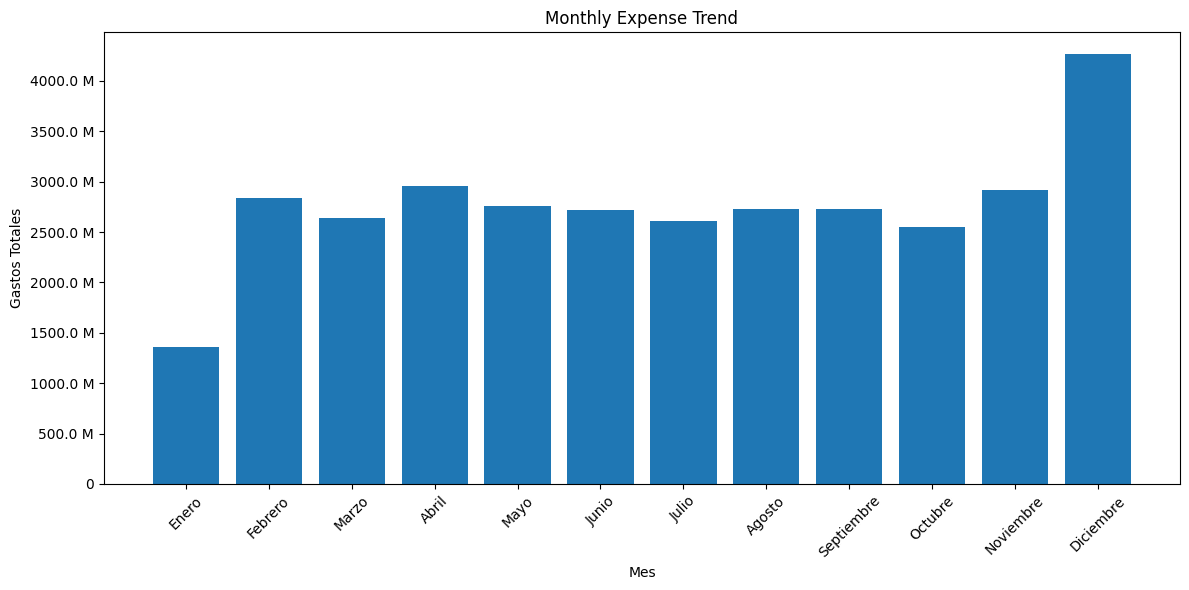

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
#Bar chart for each month's expenses


meses_orden = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
               "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]


gastos_df['MES'] = pd.Categorical(
    gastos_df['MES'],
    categories=meses_orden,
    ordered=True)

monthly_trend = gastos_df.groupby('MES', observed=True)['Gasto'].sum().reset_index()


# Define a function to format y-axis labels in M and K
def millions_and_thousands(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} M'
    elif x >= 1e3:
        return f'{x/1e3:.1f} K'
    else:
        return f'{x:.0f}'


plt.figure(figsize=(12, 6))
plt.bar(monthly_trend['MES'], monthly_trend['Gasto'])
plt.title('Monthly Expense Trend')
plt.xlabel('Mes')
plt.ylabel('Gastos Totales')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_and_thousands))  # Apply the custom formatter
plt.xticks(monthly_trend['MES'], monthly_trend['MES'])

plt.tight_layout()
plt.show()


In the month of January spending starts relatively low in January, which may be typical after the year-end holidays, where some projects or payments may be postponed, towards the end of the year there is a gradual increase in spending, culminating in December with the highest peak. This may be indicative of an effort to use the remaining budget before the end of the fiscal year and a consequence of holiday-related expenses. This behavior is common in many state organizations due to the cyclical nature of budget planning and project execution.

2.1.2. Expenses per month for each province

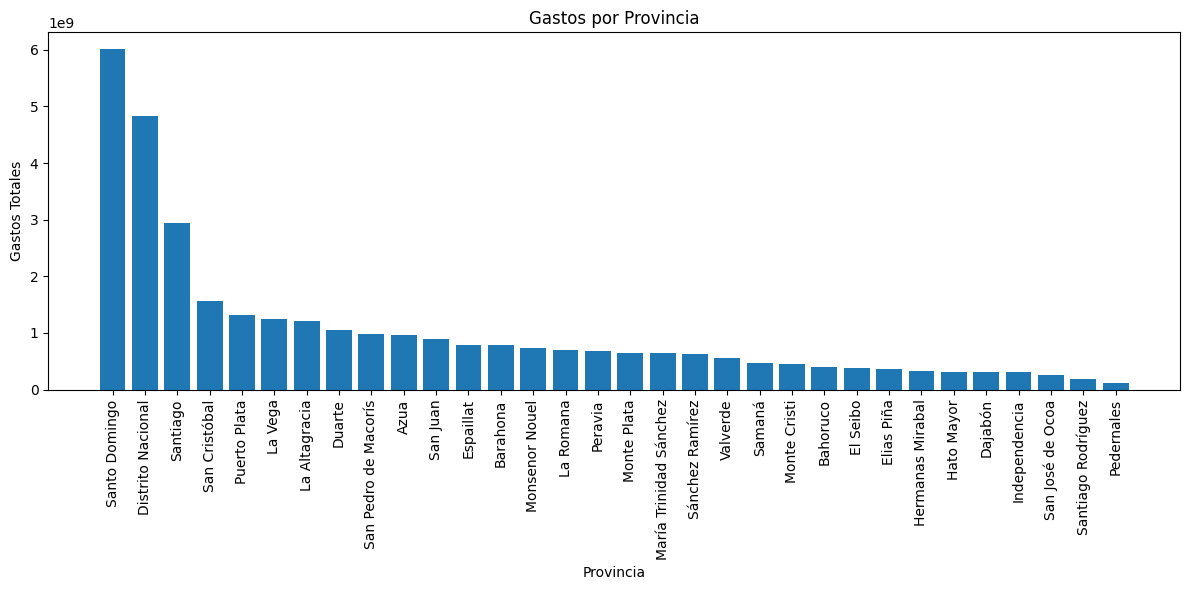

In [54]:

#BarPlot for province

province_expenses = gastos_df.groupby('PROVINCIA')['Gasto'].sum().reset_index()
province_expenses_sorted = province_expenses.sort_values(by='Gasto', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(province_expenses_sorted['PROVINCIA'], province_expenses_sorted['Gasto'])
plt.title('Gastos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Gastos Totales')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


Expenditures by province show an uneven distribution, with some provinces, such as Santo Domingo and the National District, having a much higher amount of expenditures compared to others. This order makes a lot of sense since these are the most developed cities.

Concentration of Expenditures: The graphs suggest that a large proportion of spending is concentrated in a few provinces. This could reflect the concentration of population and economic activity, or it could be the result of investment and development policies.

Provinces with Less Spending: The provinces on the far right of the graph have significantly lower expenditures. This could be because they are provinces with less population or fewer investment projects.

Expenditures by province

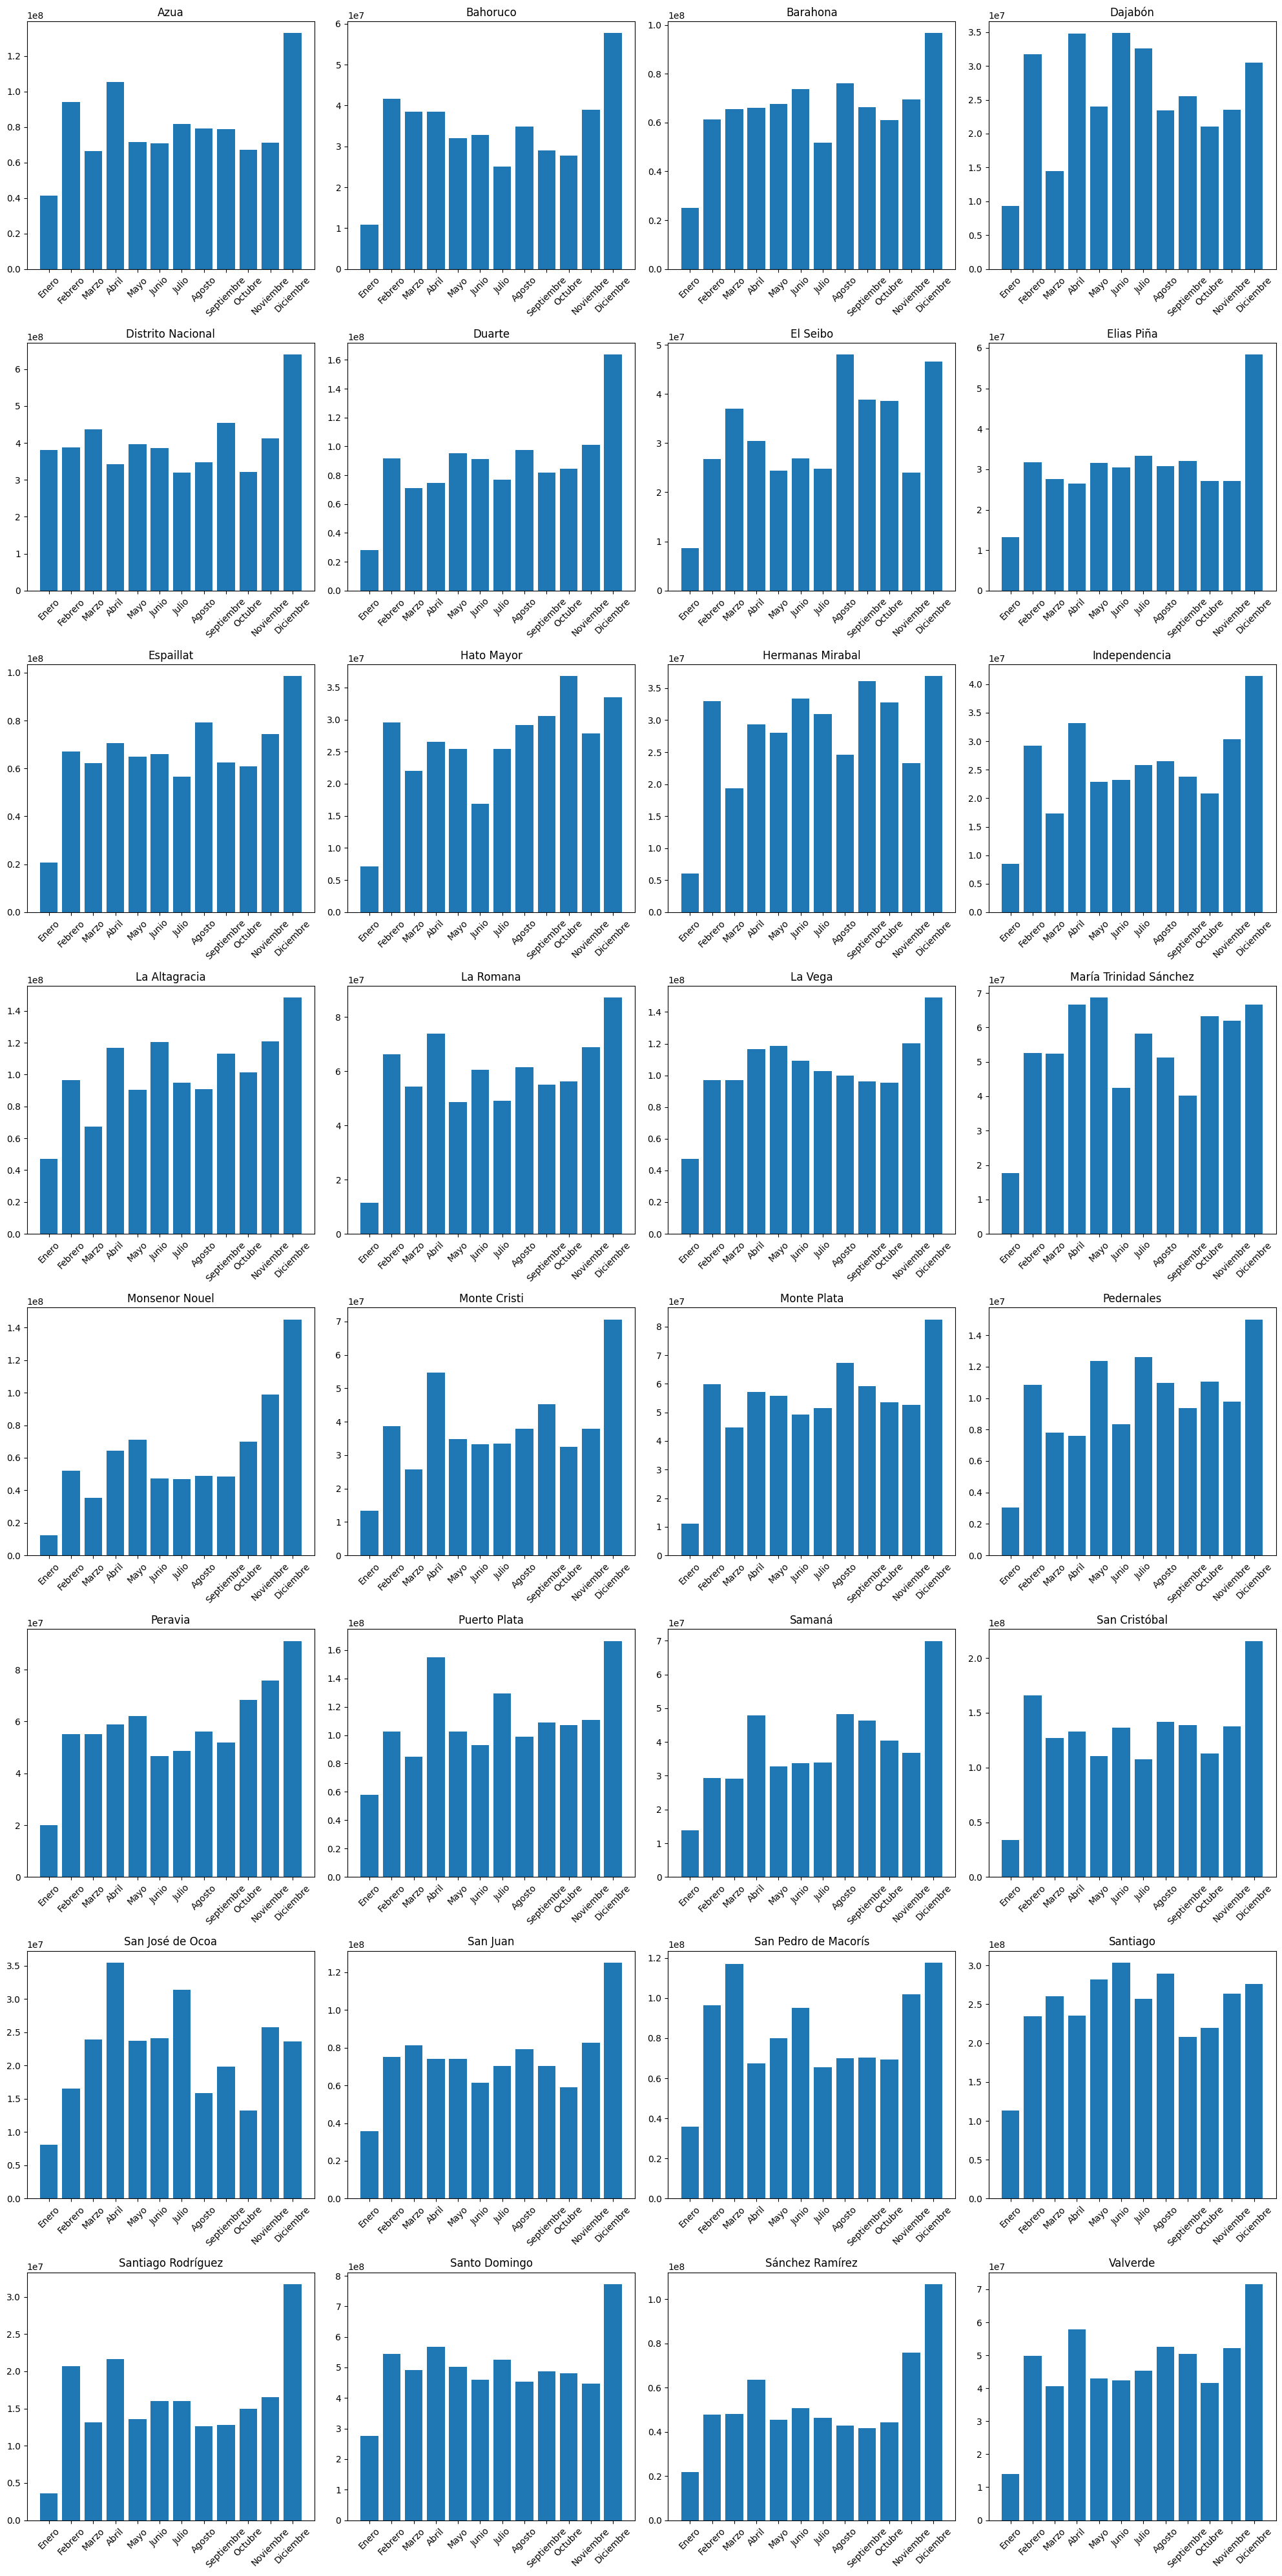

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


def millions_and_thousands(x, pos):
    if x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'


meses_orden = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
               "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
gastos_df['MES'] = pd.Categorical(gastos_df['MES'], categories=meses_orden, ordered=True)

grouped = gastos_df.groupby(['PROVINCIA', 'MES'], observed=True)['Gasto'].sum().reset_index()



num_provincias = grouped['PROVINCIA'].nunique()


num_filas = (num_provincias // 4) + (num_provincias % 4 > 0)  
fig, axs = plt.subplots(num_filas, 4, figsize=(20, num_filas*5))  
axs = axs.flatten()  


for i, provincia in enumerate(grouped['PROVINCIA'].unique()):
    provincia_data = grouped[grouped['PROVINCIA'] == provincia]
    ax = axs[i]
    ax.bar(provincia_data['MES'], provincia_data['Gasto'])
    ax.set_title(provincia)
    ax.set_xticks(range(len(provincia_data['MES'])))
    ax.set_xticklabels(meses_orden, rotation=45)

plt.tight_layout()
plt.show()


In [69]:

total_gastos_por_concepto = gastos_df.groupby('PROVINCIA')['Gasto'].sum().reset_index(name='Total Expenses')

total_gastos_por_concepto = total_gastos_por_concepto.sort_values('Total Gasto', ascending=False)

total_gastos_por_concepto['Total Gasto'] = total_gastos_por_concepto['Total Gasto'].apply(lambda x: f'${x:,.2f}')

print(total_gastos_por_concepto)


                 PROVINCIA        Total Gasto
29           Santo Domingo  $6,006,451,943.79
4        Distrito Nacional  $4,824,165,627.28
27                Santiago  $2,941,989,908.54
23           San Cristóbal  $1,560,319,620.72
21            Puerto Plata  $1,316,580,512.89
14                 La Vega  $1,248,996,938.24
12           La Altagracia  $1,207,823,859.74
5                   Duarte  $1,057,181,818.16
26    San Pedro de Macorís    $986,338,465.08
0                     Azua    $959,711,226.43
25                San Juan    $888,647,882.98
8                Espaillat    $783,234,949.25
2                 Barahona    $780,185,127.52
16          Monsenor Nouel    $740,520,813.29
13               La Romana    $693,092,818.47
20                 Peravia    $689,756,432.19
18             Monte Plata    $644,172,501.33
15  María Trinidad Sánchez    $641,606,118.74
30         Sánchez Ramírez    $635,389,277.67
31                Valverde    $561,645,624.62
22                  Samaná    $462

Variability between provinces: Each province shows different levels of variability in its data. Some provinces, such as "Santo Domingo", show considerable variability between bars, indicating significant fluctuations or changes across categories or years. Others, such as "San José de Ocoa", appear to have less variability.

Comparison between provinces: Some provinces, such as "Santo Domingo", have bars that reach the highest amounts on the vertical scale, indicating that they have the highest values in some categories compared to other provinces. In contrast, provinces such as "Pedernales" appear to have consistently lower amounts.



It appears that all provinces follow the same trend as the general trend except for 7 provinces:

1. Santiago
2. San Jose de Ocoa
3. San Pedro de Macorix
4. Maria Trinidad Sanchez 
5. Hato Mayor
6. El Seibo
7. Dajabon 

In these 7 provinces, high peaks were identified in months other than December, in contrast to the other 25 provinces where the greatest amount of expenditures were made in December.

2.1.2. Municipalities

In [56]:
# Group by 'Provincia' and count the number of unique municipalities (Ayuntamientos) in each province
unique_municipalities_per_province = gastos_df.groupby('PROVINCIA')['Ayuntamiento'].nunique().reset_index()


unique_municipalities_per_province.columns = ['PROVINCIA', 'Number of Unique Ayuntamientos']

display(unique_municipalities_per_province)

unique_municipalities_count = gastos_df["Ayuntamiento"].nunique()
print(f"Total number of unique municipalities: {unique_municipalities_count}")


,PROVINCIA,Number of Unique Ayuntamientos
0,Azua,32
1,Bahoruco,14
2,Barahona,21
3,Dajabón,9
4,Distrito Nacional,1
5,Duarte,18
6,El Seibo,7
7,Elias Piña,13
8,Espaillat,15
9,Hato Mayor,7


Total number of unique municipalities: 391


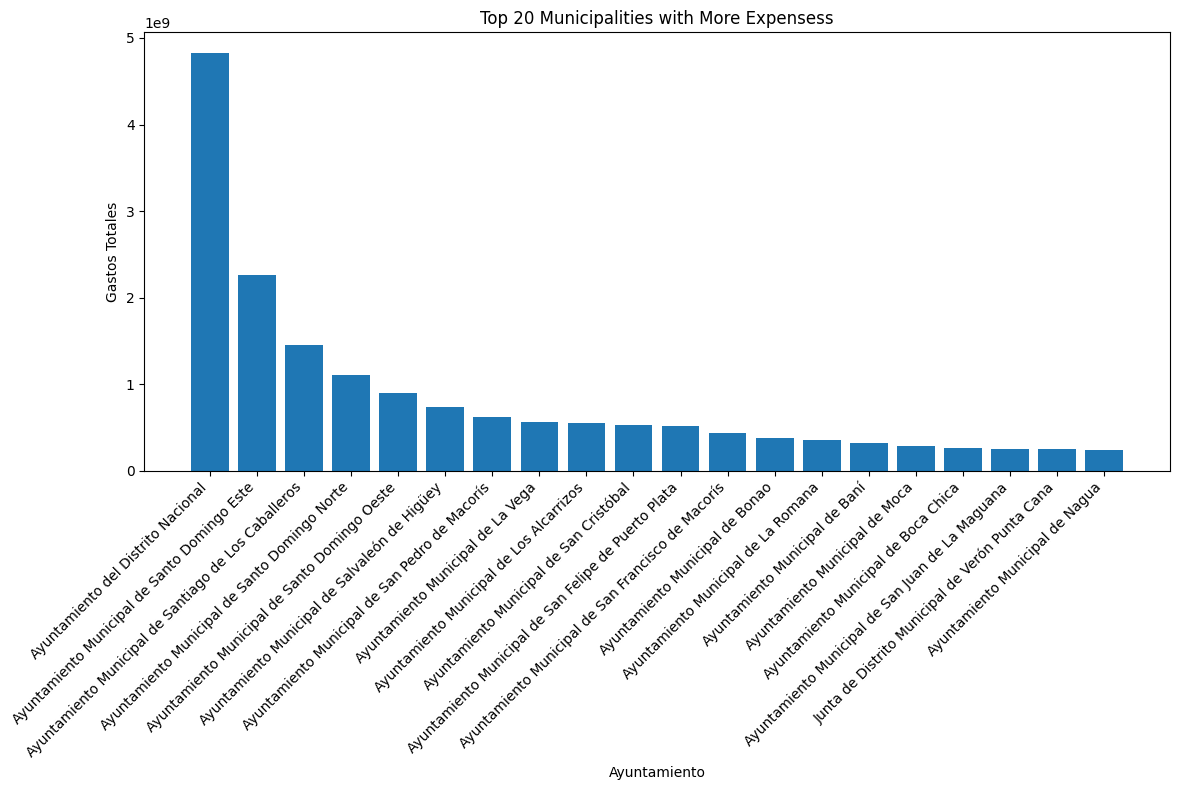

In [66]:
#Top 20 municipalities with the highest expenditure


ayuntamiento_expenses = gastos_df.groupby('Ayuntamiento')['Gasto'].sum().reset_index()


ayuntamiento_expenses_sorted = ayuntamiento_expenses.sort_values(by='Gasto', ascending=False)


top_20_ayuntamientos = ayuntamiento_expenses_sorted.head(20)


plt.figure(figsize=(12, 8))


plt.bar(top_20_ayuntamientos['Ayuntamiento'], top_20_ayuntamientos['Gasto'])
plt.title('Top 20 Municipalities with More Expensess')
plt.xlabel('Ayuntamiento')
plt.ylabel('Gastos Totales')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()



After the National District, there is a notable decrease in expenditures in the second and third municipalities, Santiago de los Caballeros and Santo Domingo Este, respectively.
Starting with the fourth municipality, Santo Domingo Norte, the decrease in expenditures becomes more gradual.

The municipality of the National District stands out as an outlier due to its exceptionally high expenditures compared to the rest.
This type of graph may suggest that there are specific factors or unique conditions that justify the high expenditures of the National District, such as a larger population, more infrastructure, or greater administrative responsibilities.

Note: In the following link you can see a map made in folium where you can categorize the analyses made in this instance by municipality, in which you can find a map highlighting the 391 registered municipalities.  

To see the results of the 393 municipalities in the country, click on the following link:   "                  "

In [58]:
import pandas as pd


Q1 = gastos_df['Gasto'].quantile(0.25)
Q3 = gastos_df['Gasto'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_filtered = gastos_df[(gastos_df['Gasto'] < lower_bound) | (gastos_df['Gasto'] > upper_bound)][['MES', 'PROVINCIA', 'Ayuntamiento', 'CONCEPTO', 'Gasto']]

print(f"lower_bound: {lower_bound}, upper_bound: {upper_bound}")
display(outliers_filtered)


lower_bound: -90299.525, upper_bound: 163779.715


,MES,PROVINCIA,Ayuntamiento,CONCEPTO,Gasto
0,Enero,Azua,Ayuntamiento Municipal de Azua de Compostela,Obras,20971739.06
1,Enero,Azua,Junta de Distrito Municipal de Los Jovillos,Obras,1110798.18
2,Enero,Azua,Ayuntamiento Municipal de Las Charcas,Contratación de servicios,941202.00
3,Enero,Azua,Junta de Distrito Municipal de Barreras,Obras,800000.00
4,Enero,Azua,Junta de Distrito Municipal de Los Toros,Obras,717273.00
...,...,...,...,...,...
349342,Diciembre,Valverde,Ayuntamiento Municipal de Laguna Salada,Materiales y suministros,167418.00
349343,Diciembre,Valverde,Ayuntamiento Municipal de Santa Cruz de Mao,Obras,166070.00
349344,Diciembre,Valverde,Junta de Distrito Municipal de Jaibón (Pueblo ...,Contratación de servicios,165960.00
349345,Diciembre,Valverde,Junta de Distrito Municipal de Maizal,Remuneraciones y contribuciones,165367.00


Based on the IQR method to identify outliers we can identify 32,424 out of 352,642 records, that represents approximately 9.19% of your total data.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


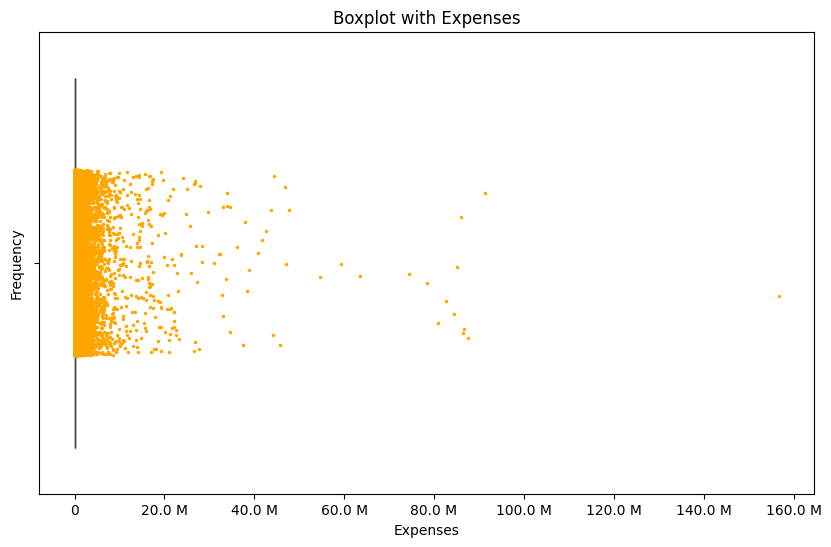

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a function to format numbers in millions (M) and thousands (K)
def millions_and_thousands(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} M'
    elif x >= 1e3:
        return f'{x/1e3:.1f} K'
    else:
        return f'{x:.0f}'

plt.figure(figsize=(10, 6))
sns.boxplot(x=gastos_df['Gasto'], showfliers=False)
sns.stripplot(x=gastos_df['Gasto'], color='orange', jitter=0.2, size=2.5)

# Get the current axis and apply the formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions_and_thousands))

plt.title('Boxplot with Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()


Most of the data points are clustered near the origin, indicating that most of the expenditures are low. There is a decrease in the frequency of expenditures as they increase, with very few expenditures reaching the higher ranges. To see more accurately we will look at a BoxPlot.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


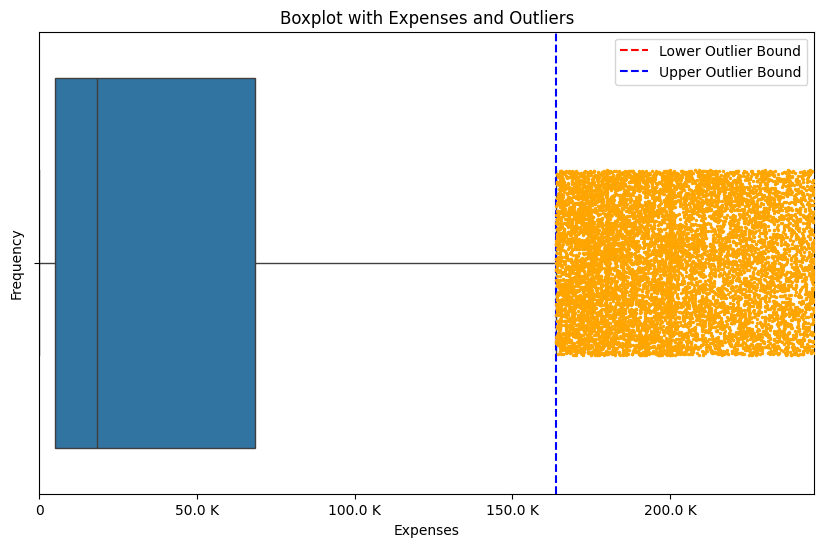

In [60]:

# Define the formatter function
def millions_and_thousands(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} M'
    elif x >= 1e3:
        return f'{x/1e3:.1f} K'
    else:
        return f'{x:.0f}'

plt.figure(figsize=(10, 6))
sns.boxplot(x=gastos_df['Gasto'], showfliers=False)
sns.stripplot(x=outliers_filtered['Gasto'], color='orange', jitter=0.2, size=2.5)

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions_and_thousands))

# Draw lines for the lower and upper outlier bounds
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Outlier Bound')
plt.axvline(x=upper_bound, color='blue', linestyle='--', label='Upper Outlier Bound')

ax.set_xlim([0, upper_bound * 1.5]) 

plt.title('Boxplot with Expenses and Outliers')
plt.xlabel('Expenses')
plt.ylabel('Frequency')


plt.legend()
plt.show()


- 25% $4,892.46
- 50% $18,270.00
- 75% $68,271.10

Taking into account the interquantile values we can see a boxplot that combined with a stripplot to visualize the distribution of expenditures and specific outliers. 

- Boxplot (Blue Box):

The box represents the main distribution of the expenditure data, the vertical line within the box indicates the median expenditure, the range of the box (known as the interquartile range or IQR) shows the middle half of the data, the top edge of the box indicates the third quartile (75% of the data are less than this value) and the bottom edge the first quartile (25% of the data are less than this value).

- Stripplot (Orange Dots):

Each orange dot represents an outlier in expenditures, the concentration of dots suggests a large number of outliers, possibly indicating significant variability in expenditures or the presence of many exceptional or extraordinary expenditures. The value of 163779.715 is the upper limit for outliers, any expenditure value greater than this number would be considered an outlier at the high end. This means that expenditures exceeding this limit are unusually high compared to the rest of the data.

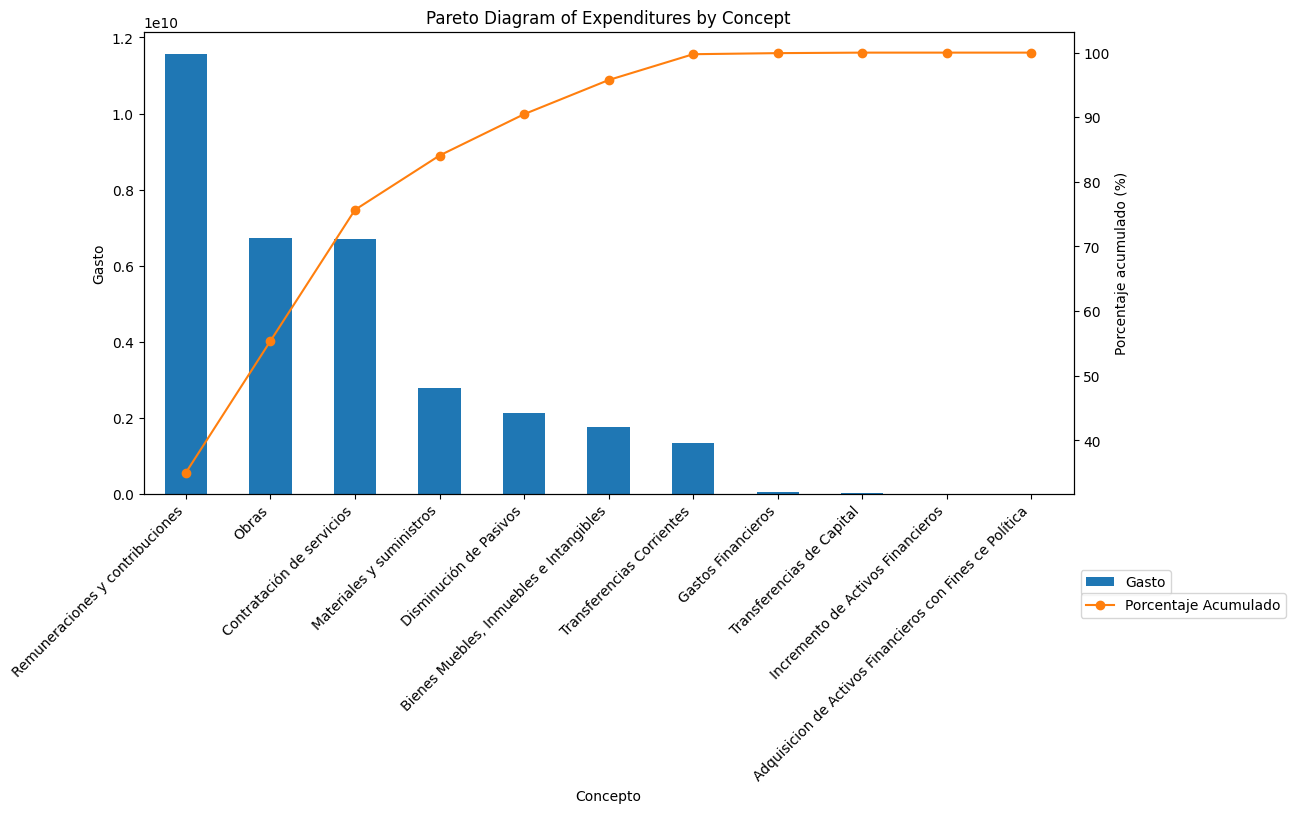

In [70]:
# Creating a pareto to determine the items that account for 80% of expenses

pareto_df = gastos_df.groupby('CONCEPTO')['Gasto'].sum().reset_index()

pareto_df.sort_values('Gasto', ascending=False, inplace=True)

pareto_df['Porcentaje'] = 100 * (pareto_df['Gasto'] / pareto_df['Gasto'].sum())

pareto_df['Porcentaje_acumulado'] = pareto_df['Porcentaje'].cumsum()

# Crear un pareto para determinar las partidas que representan el 80% de los gastos
cutoff_index = pareto_df[pareto_df['Porcentaje_acumulado'] >= 80].index.min()


fig, ax = plt.subplots(figsize=(12, 6)) 

# Changes the color of the bars depending on whether they are before or after the 80% cutoff
colors = ['C2' if i <= cutoff_index else 'C0' for i in pareto_df.index]

pareto_df.plot(kind='bar', x='CONCEPTO', y='Gasto', ax=ax, color=colors)

pareto_df.plot(kind='line', x='CONCEPTO', y='Porcentaje_acumulado', ax=ax, secondary_y=True, color='C1', marker='o')


# Añade un título y etiquetas a los ejes
ax.set_title('Pareto Diagram of Expenditures by Concept')
ax.set_xlabel('Concepto')
ax.set_ylabel('Gasto')


ax.right_ax.set_ylabel('Porcentaje acumulado (%)')
ax.set_xticklabels(pareto_df['CONCEPTO'], rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, -0.15))


ax.right_ax.legend(['Porcentaje Acumulado'], loc='upper left', bbox_to_anchor=(1, -0.20))
plt.show()


The Pareto chart of expenditures by item. The orange line represents the accumulated percentage of expenses, and the blue bars represent the individual expenses by concept, the red dashed line indicates the point where 80% of the total expenses are reached. According to the results, 80% is concentrated in these three items, "Remunerations and Contributions", "Contracting and Services" and "Works", which represent 20% of all the items recorded.

In [62]:
conceptos = gastos_df["CONCEPTO"].value_counts()
conceptos

CONCEPTO
Remuneraciones y contribuciones                             122310
Contratación de servicios                                    56724
Materiales y suministros                                     34409
Transferencias Corrientes                                    18889
Obras                                                        17527
Bienes Muebles, Inmuebles e Intangibles                       5519
Disminución de Pasivos                                        5389
Gastos Financieros                                             763
Transferencias de Capital                                      332
Incremento de Activos Financieros                               10
Adquisicion de Activos Financieros con Fines ce Política         3
Name: count, dtype: int64

In [63]:
# Calcular el total de gastos para cada 'CONCEPTO'
total_gastos_por_concepto = gastos_df.groupby('CONCEPTO')['Gasto'].sum().reset_index(name='Total Gasto')

# Ordenar los resultados de mayor a menor gasto
total_gastos_por_concepto = total_gastos_por_concepto.sort_values('Total Gasto', ascending=False)

# Formatear la columna 'Total Gasto' en formato de dinero
total_gastos_por_concepto['Total Gasto'] = total_gastos_por_concepto['Total Gasto'].apply(lambda x: f'${x:,.2f}')

# Mostrar el total de gastos por 'CONCEPTO' ordenados de mayor a menor
print(total_gastos_por_concepto)


                                             CONCEPTO         Total Gasto
8                     Remuneraciones y contribuciones  $11,575,706,879.26
7                                               Obras   $6,737,068,144.24
2                           Contratación de servicios   $6,709,861,557.74
6                            Materiales y suministros   $2,778,281,678.09
3                              Disminución de Pasivos   $2,115,385,756.75
1             Bienes Muebles, Inmuebles e Intangibles   $1,747,424,865.38
9                           Transferencias Corrientes   $1,321,761,869.08
4                                  Gastos Financieros      $55,025,637.08
10                          Transferencias de Capital      $26,063,795.73
5                   Incremento de Activos Financieros         $118,500.00
0   Adquisicion de Activos Financieros con Fines c...          $56,982.00


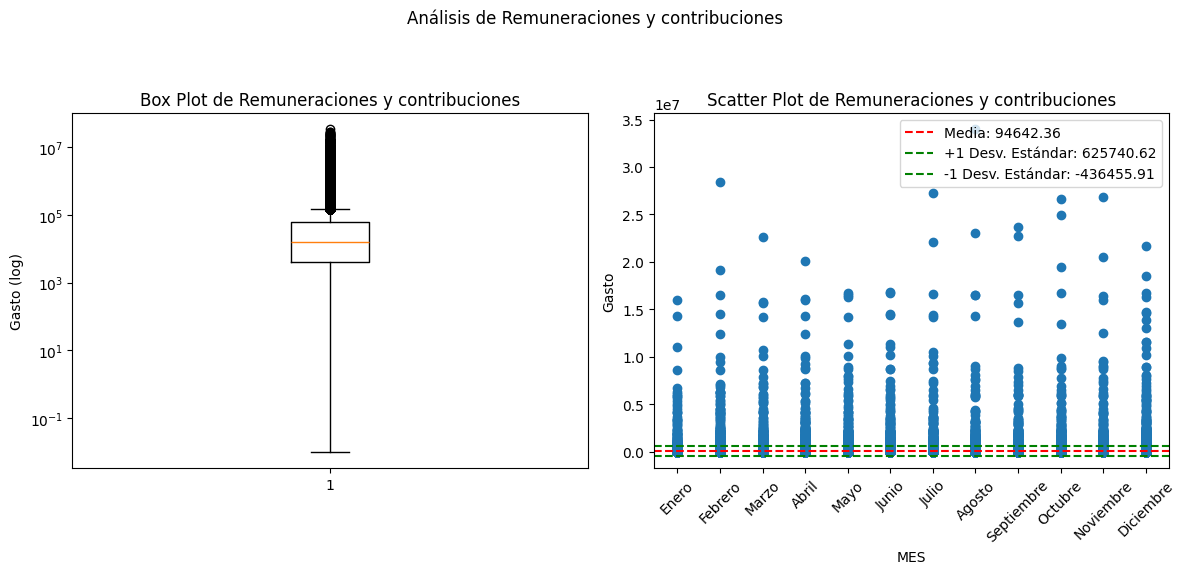

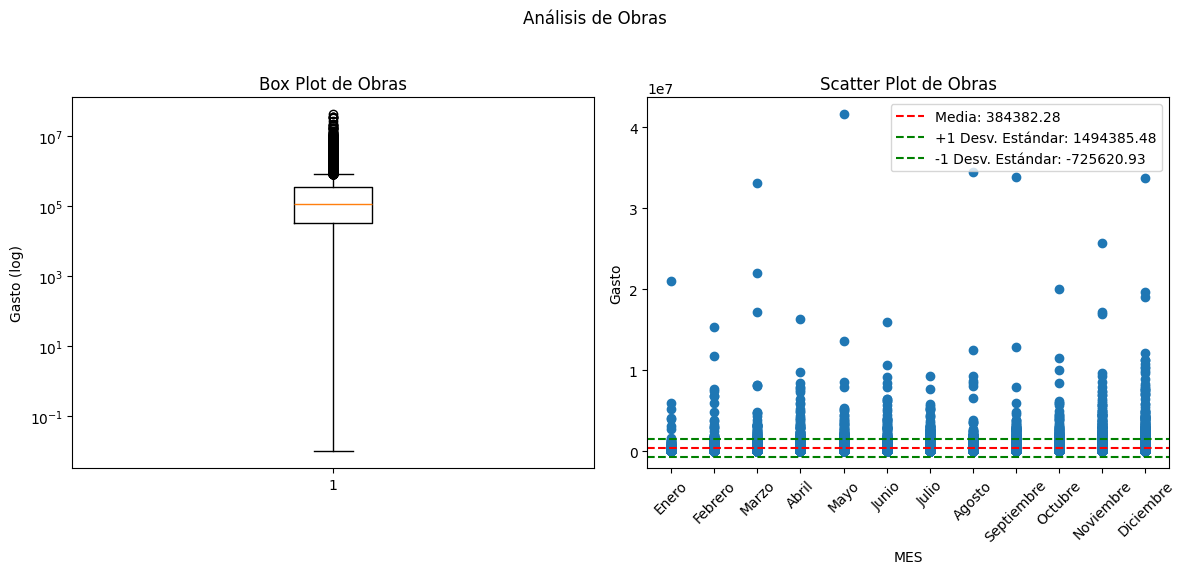

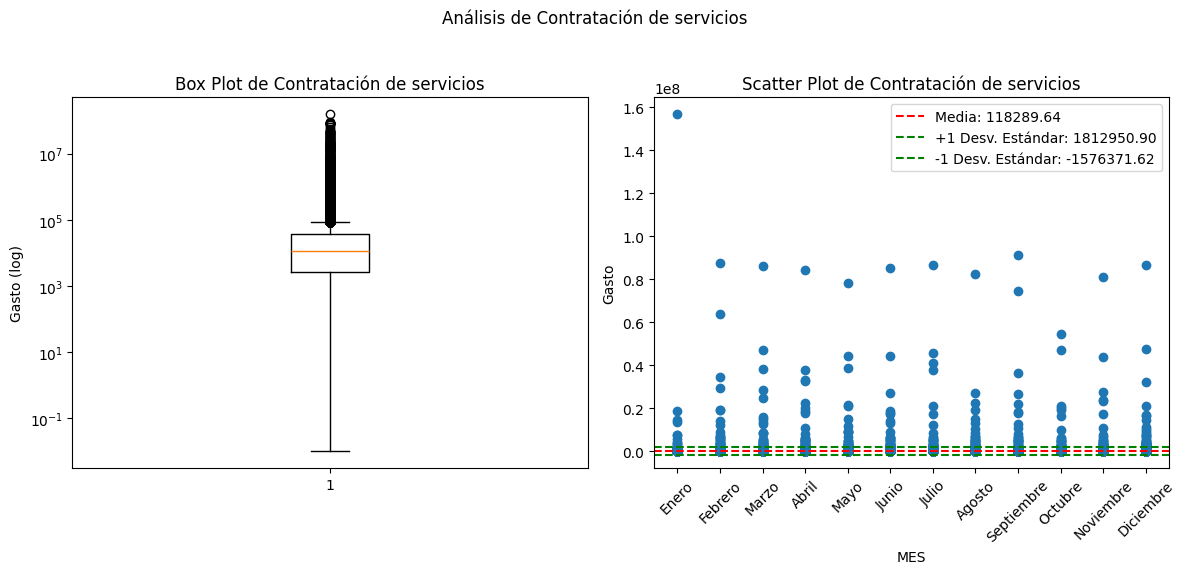

In [64]:

# Analyzing variability and distribution of the 3 main concepts


conceptos = ['Remuneraciones y contribuciones', 'Obras', 'Contratación de servicios']


for concepto in conceptos:
    
    df_filtrado = gastos_df[gastos_df['CONCEPTO'] == concepto]
    media = df_filtrado['Gasto'].mean()
    desv_std = df_filtrado['Gasto'].std()
    
    
    plt.figure(figsize=(12, 6))
    
    # Box plot 
    ax1 = plt.subplot(1, 2, 1)
    ax1.boxplot(df_filtrado['Gasto'])
    ax1.set_yscale('log')
    plt.title(f'Box Plot de {concepto}')
    plt.ylabel('Gasto (log)')
    
      # Scatter 
    plt.subplot(1, 2, 2)
    plt.scatter(df_filtrado['MES'], df_filtrado['Gasto'])
    plt.axhline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axhline(media + desv_std, color='green', linestyle='--', label=f'+1 Desv. Estándar: {media + desv_std:.2f}')
    plt.axhline(media - desv_std, color='green', linestyle='--', label=f'-1 Desv. Estándar: {media - desv_std:.2f}')
    plt.title(f'Scatter Plot de {concepto}')
    plt.xlabel('MES')
    plt.ylabel('Gasto')
    plt.legend()
    plt.xticks(rotation=45)
    
   
    plt.suptitle(f'Análisis de {concepto}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Box Plots:

Remunerations and contributions: Expenditures vary significantly, as can be seen by the wide range of values in the box plot. The median (the line within the box) is closer to the lower quartile, indicating that a greater proportion of the data is in the lower range of expenditures. Outliers are present and are indicated by dots above the upper "whisker" of the box plot.

Works: As in the first case, there is a large variation in expenditures. The median appears to be more balanced between the upper and lower quartiles, although there are many outliers extending into the higher expenditures.

Contracting services: Expenditures appear to be more uniform compared to the other two categories, as the box plot is more compact. However, there are significant outliers, suggesting that some services are much more expensive than most.

In all 3 concepts we could visualize the same phenomenon as in the previous boxplots, a huge amount of outlier data on the upper side.

Scatter Plots:

Remunerations and contributions: Most of the expenses are clustered in the lower range, with some extremely high values that could be annual expenses or large one-time payments. The mean is influenced by these high values.

Works: There is a more even distribution of expenditures throughout the year, but as with remunerations, there are some extremely high values that affect the mean and standard deviation.

Contracting services: Expenditures are noticeably more clustered near the x-axis, with some sporadic high values. The mean and standard deviation are relatively low compared to the other categories, indicating less variability in expenditures, although the impact of outliers on the mean should be noted.

C:\Users\franc\AppData\Local\Temp\ipykernel_9336\781622561.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = gastos_df.pivot_table(values='Gasto', index='MES', columns='CONCEPTO', aggfunc='sum')


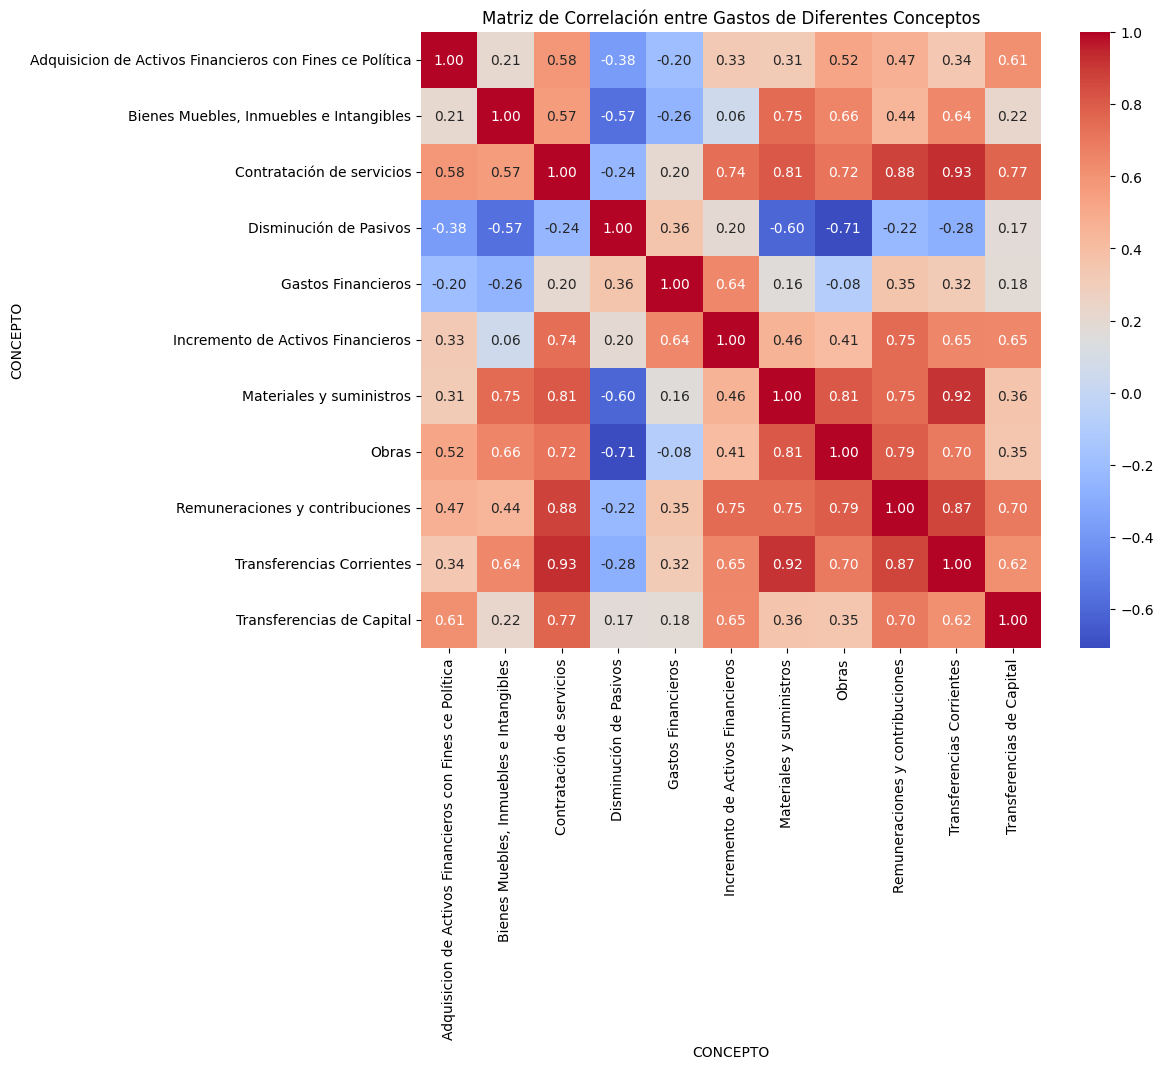

In [65]:
# Heat map to see the correlation

pivot_df = gastos_df.pivot_table(values='Gasto', index='MES', columns='CONCEPTO', aggfunc='sum')
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlación entre Gastos de Diferentes Conceptos')
plt.show()


Positive Correlations:

- Acquisition of Financial Assets for Policy Purposes and Capital Transfers: they have a correlation of 0.91, which is very high. This could suggest that when the government makes financial investments for policy purposes, there is also an increase in capital transfers, which could be part of the same long-term investment or project financing strategy.

- Movable, Immovable and Intangible Assets and Contracting of Services: With a correlation of 0.76, it indicates that the acquisition of tangible and intangible assets is often accompanied by the contracting of services, which makes sense since the management or maintenance of such assets often requires specialized services.

- Increase in Financial Assets and Compensation and contributions: With a correlation of 0.89, this could indicate that as the entity increases its financial assets, the amount of remunerations and contributions also increases, possibly due to hiring more staff or increasing salaries as a result of a better financial position.

- Materials and Supplies and Works: With a correlation of 0.88, this suggests that there is a direct relationship between purchasing materials and carrying out works. This makes practical sense since materials and supplies are needed to carry out works.

- Current Transfers and Salaries and contributions: With a correlation of 0.94, one of the highest in the graph, this may indicate that current transfers (which may include subsidies or transfers to other entities) are closely linked to remunerations and contributions, which may be a result of policies that seek to redistribute resources through payroll and subsidies.

- There are no strong negative correlations in this graph. Most of the values are positive, indicating that in general, the expenditure concepts tend to move together in the same direction.

It is important to note that correlation does not imply causation. Even if two concepts are correlated, it does not mean that one causes the other, but rather that they tend to vary together. In addition, the specific context of these concepts (such as the regulatory framework, economic policies, or the nature of the spending entity) can significantly influence the reasons behind these correlations.